In [1]:
# Objective is to train a convolutional neural network to classify chemical structures

In [2]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [3]:
# import data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = 'drive/MyDrive/ML-Oxford/StructureML'

X_train = np.load(path+'/X_train.npy')
X_test = np.load(path+'/X_test.npy')
Y_train = np.load(path+'/Y_train.npy')
Y_test = np.load(path+'/Y_test.npy')

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1036, 900) (1036, 11) (260, 900) (260, 11)


In [5]:
# Need to reformat the X_train and X_test data back to a 2d matrix for CNNs

X_train = X_train.reshape((1036, 30, 30, 1))
X_test = X_test.reshape((260, 30, 30, 1))

print(X_train.shape, X_test.shape)

(1036, 30, 30, 1) (260, 30, 30, 1)


In [6]:
# Build the baseline CNN

from keras import datasets, layers, models, optimizers

def build(input_shape, classes):
  model = models.Sequential()
  model.add(layers.Convolution2D(20, (3, 3), activation='relu',
                                 input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
  model.add(layers.Flatten())
  model.add(layers.Dense(500, activation='relu'))
  model.add(layers.Dense((classes), activation='softmax'))
  return model

In [7]:
baseline_cnn = build(input_shape=(30, 30, 1), classes=11)

In [8]:
# Compile the baseline model

baseline_cnn.compile(loss='categorical_crossentropy',
                     optimizer=optimizers.Adam(), metrics=['accuracy'])

baseline_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 20)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14580)             0         
                                                                 
 dense (Dense)               (None, 500)               7290500   
                                                                 
 dense_1 (Dense)             (None, 11)                5511      
                                                                 
Total params: 7,296,211
Trainable params: 7,296,211
Non-trainable params: 0
______________________________________________

In [9]:
# Train the baseline model

callbacks = [
    keras.callbacks.TensorBoard(log_dir=path+'/logs')
]

baseline_history = baseline_cnn.fit(X_train, Y_train, batch_size=32,
                           epochs=10, verbose=True, validation_split=0.2,
                           callbacks=callbacks)


Epoch 1/10
26/26 [==============================] - 8s 202ms/step - loss: 2.1716 - accuracy: 0.2150 - val_loss: 1.9150 - val_accuracy: 0.3269
Epoch 2/10
26/26 [==============================] - 6s 214ms/step - loss: 1.3786 - accuracy: 0.5676 - val_loss: 1.4148 - val_accuracy: 0.5192
Epoch 3/10
26/26 [==============================] - 7s 270ms/step - loss: 0.8617 - accuracy: 0.7367 - val_loss: 1.0851 - val_accuracy: 0.6731
Epoch 4/10
26/26 [==============================] - 5s 193ms/step - loss: 0.4683 - accuracy: 0.8804 - val_loss: 0.9362 - val_accuracy: 0.7692
Epoch 5/10
26/26 [==============================] - 3s 101ms/step - loss: 0.2160 - accuracy: 0.9614 - val_loss: 0.8914 - val_accuracy: 0.7740
Epoch 6/10
26/26 [==============================] - 5s 179ms/step - loss: 0.1354 - accuracy: 0.9710 - val_loss: 0.7638 - val_accuracy: 0.7981
Epoch 7/10
26/26 [==============================] - 3s 108ms/step - loss: 0.0658 - accuracy: 0.9928 - val_loss: 0.8135 - val_accuracy: 0.7740
Epoch 

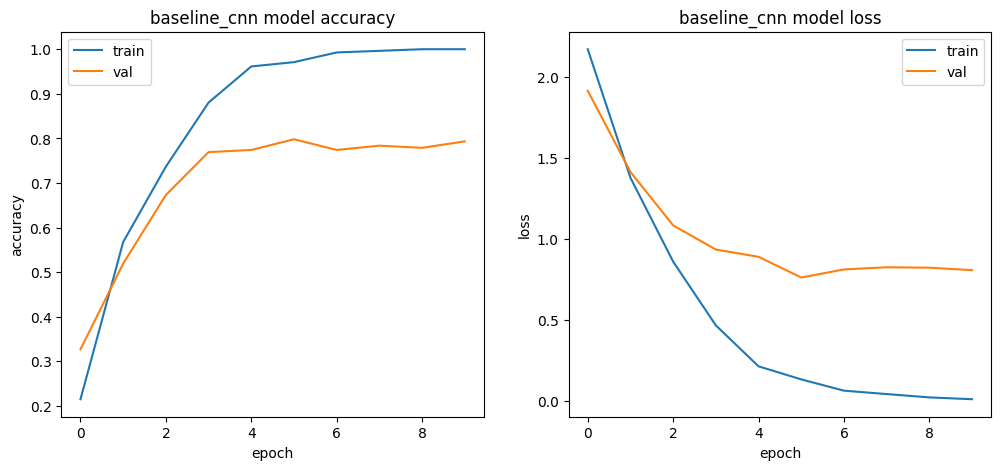

In [10]:
# visualise training

def visualise_training(model_history, model_name, accuracy=True, loss=True):

  fig, ax = plt.subplots(1,2, figsize=(12, 5))

  if accuracy:
    ax[0].plot(model_history.history['accuracy'])
    ax[0].plot(model_history.history['val_accuracy'])
    ax[0].set_title(label=f'{model_name} model accuracy')
    ax[0].set_ylabel('accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].legend(['train', 'val'], loc='upper left')

  if loss:
    ax[1].plot(model_history.history['loss'])
    ax[1].plot(model_history.history['val_loss'])
    ax[1].set_title(label=f'{model_name} model loss')
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('epoch')
    ax[1].legend(['train', 'val'], loc='upper right')

    plt.show()

visualise_training(baseline_history, 'baseline_cnn')

In [11]:
# Build a LeNet model

def build_lenet(input_shape, classes):
  # initialise model
  model = models.Sequential()
  # first convolution and pooling layers
  model.add(layers.Convolution2D(20, (5, 5), activation='relu',
                                 input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  # second convolution and pooling layers
  model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  # flattening layer
  model.add(layers.Flatten())
  # dense layers
  model.add(layers.Dense(500, activation='relu'))
  model.add(layers.Dense(classes, activation="softmax"))
  return model

In [12]:
lenet_cnn = build_lenet(input_shape=(30, 30, 1), classes=11)

lenet_cnn.compile(loss='categorical_crossentropy',
                     optimizer=optimizers.Adam(), metrics=['accuracy'])

lenet_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 20)        520       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 50)          25050     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [13]:
lenet_history = lenet_cnn.fit(X_train, Y_train, batch_size=32,
                           epochs=10, verbose=True, validation_split=0.2,
                           callbacks=callbacks)

Epoch 1/10
26/26 [==============================] - 3s 83ms/step - loss: 2.2943 - accuracy: 0.1787 - val_loss: 2.2073 - val_accuracy: 0.1635
Epoch 2/10
26/26 [==============================] - 1s 45ms/step - loss: 1.9273 - accuracy: 0.2923 - val_loss: 1.6583 - val_accuracy: 0.3558
Epoch 3/10
26/26 [==============================] - 1s 41ms/step - loss: 1.3768 - accuracy: 0.4831 - val_loss: 1.3339 - val_accuracy: 0.4712
Epoch 4/10
26/26 [==============================] - 1s 43ms/step - loss: 1.1057 - accuracy: 0.5809 - val_loss: 1.1347 - val_accuracy: 0.5769
Epoch 5/10
26/26 [==============================] - 1s 41ms/step - loss: 0.8502 - accuracy: 0.6715 - val_loss: 1.0517 - val_accuracy: 0.5865
Epoch 6/10
26/26 [==============================] - 1s 43ms/step - loss: 0.7119 - accuracy: 0.7415 - val_loss: 0.9346 - val_accuracy: 0.6490
Epoch 7/10
26/26 [==============================] - 1s 40ms/step - loss: 0.6136 - accuracy: 0.7959 - val_loss: 0.7531 - val_accuracy: 0.6779
Epoch 8/10
26

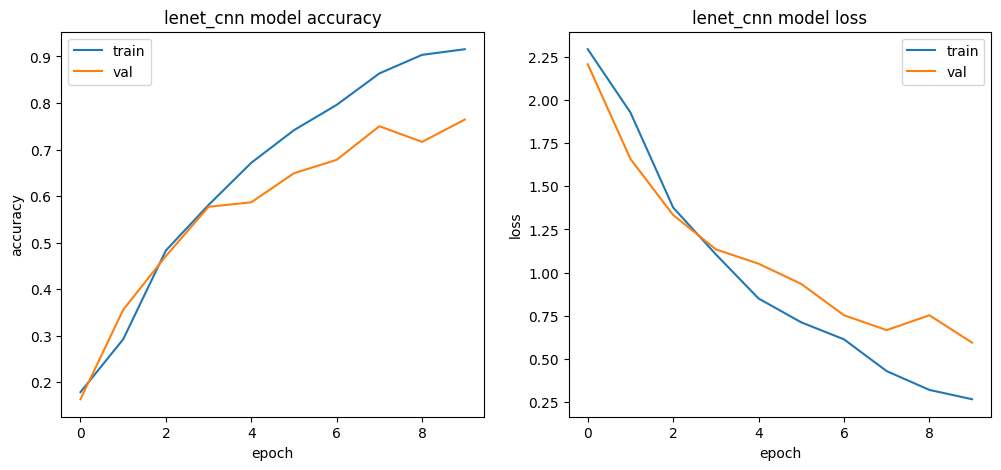

In [14]:
visualise_training(lenet_history, 'lenet_cnn')

training of lenet model is slower but seems to be overfitting less. Let's increase the epochs

In [15]:
lenet_25_epochs = build_lenet(input_shape=(30, 30, 1), classes=11)
lenet_25_epochs.compile(loss='categorical_crossentropy',
                     optimizer=optimizers.Adam(), metrics=['accuracy'])

lenet_25_epochs_history = lenet_25_epochs.fit(X_train, Y_train, batch_size=32,
                           epochs=25, verbose=True, validation_split=0.2,
                           callbacks=callbacks)

Epoch 1/25
26/26 [==============================] - 3s 83ms/step - loss: 2.3111 - accuracy: 0.1558 - val_loss: 2.2541 - val_accuracy: 0.1779
Epoch 2/25
26/26 [==============================] - 2s 57ms/step - loss: 2.0190 - accuracy: 0.2512 - val_loss: 1.8502 - val_accuracy: 0.2981
Epoch 3/25
26/26 [==============================] - 1s 40ms/step - loss: 1.5169 - accuracy: 0.4106 - val_loss: 1.4070 - val_accuracy: 0.3942
Epoch 4/25
26/26 [==============================] - 1s 40ms/step - loss: 1.1493 - accuracy: 0.5543 - val_loss: 1.2396 - val_accuracy: 0.4904
Epoch 5/25
26/26 [==============================] - 1s 43ms/step - loss: 0.9262 - accuracy: 0.6739 - val_loss: 0.9960 - val_accuracy: 0.5529
Epoch 6/25
26/26 [==============================] - 1s 40ms/step - loss: 0.7175 - accuracy: 0.7524 - val_loss: 0.9377 - val_accuracy: 0.6538
Epoch 7/25
26/26 [==============================] - 1s 44ms/step - loss: 0.6045 - accuracy: 0.7717 - val_loss: 0.9123 - val_accuracy: 0.6442
Epoch 8/25
26

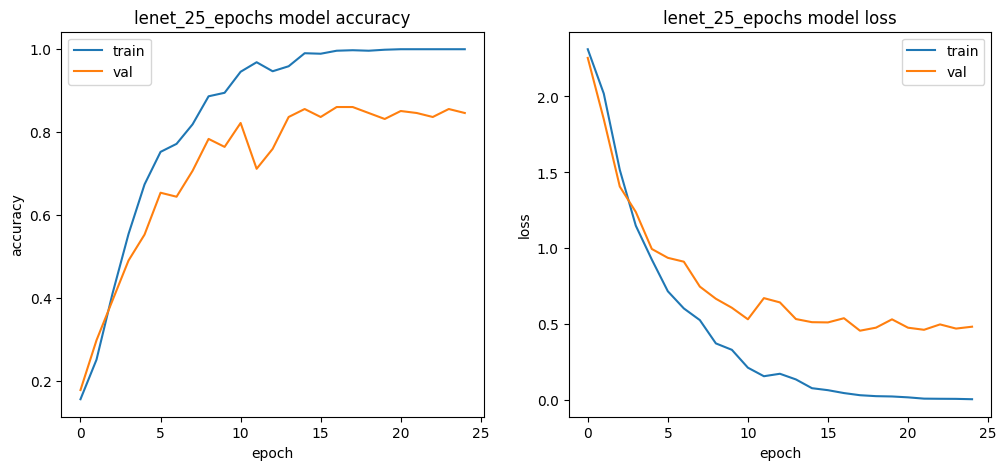

In [16]:
visualise_training(lenet_25_epochs_history, 'lenet_25_epochs')

(-0.5, 29.5, 29.5, -0.5)

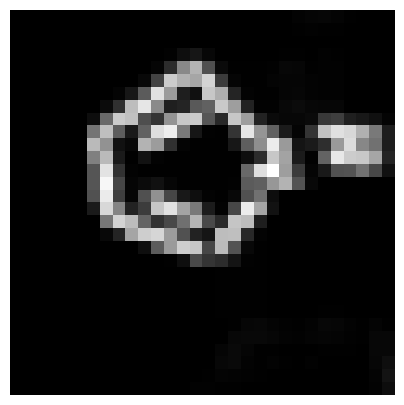

In [17]:
# Visualise the effect of each layer

img = X_train[59].reshape(1,30,30,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [18]:
from keras.models import Model

layer_outputs = [layer.output for layer in lenet_25_epochs.layers]
activation_model = Model(inputs=lenet_25_epochs.input,
                         outputs=layer_outputs)



In [19]:
activations = activation_model.predict(img)

1/1 [==============================] - 0s 113ms/step


In [20]:
layer_names = []
for layer in lenet_25_epochs.layers[1:7]:
    layer_names.append(layer.name)

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map

<ipython-input-21-e770b4babc4e>:11: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


IndexError: ignored

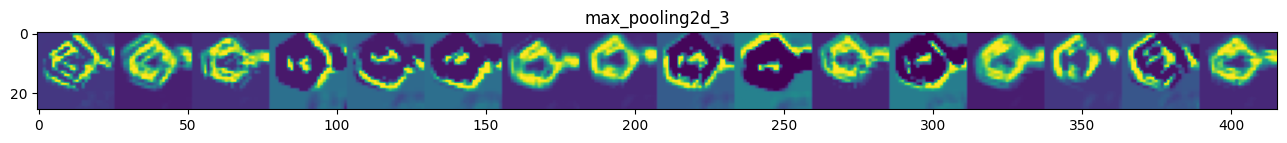

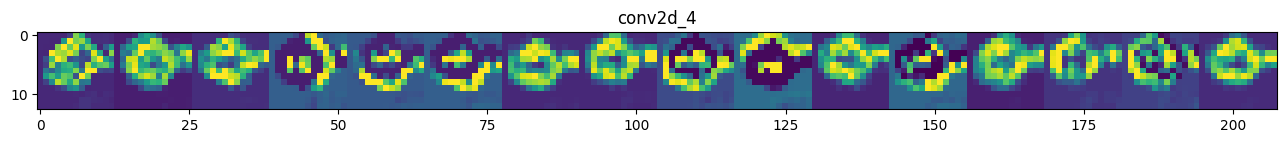

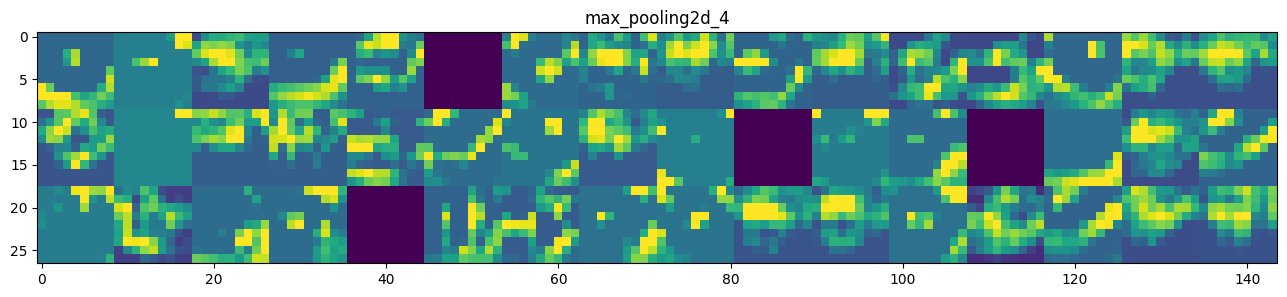

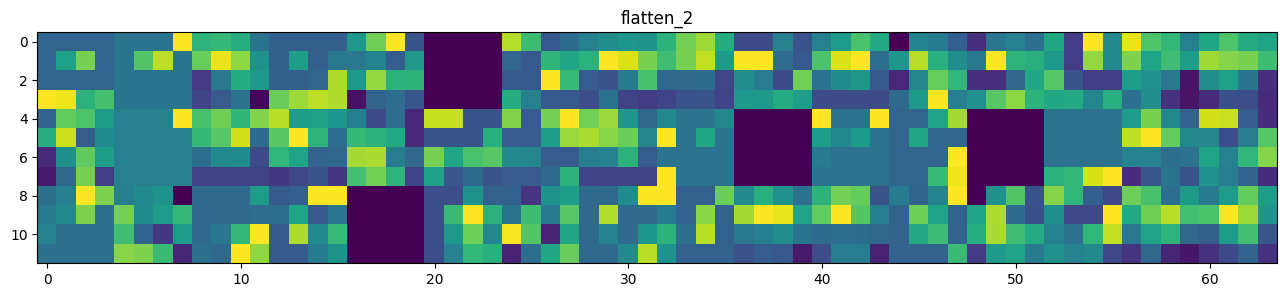

In [21]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')